https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/

In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data

--2018-01-02 11:50:26--  http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data
Resolving archive.ics.uci.edu... 128.195.10.249
Connecting to archive.ics.uci.edu|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76467 (75K) [text/plain]
Saving to: ‘ionosphere.data’

ionosphere.data     100%[===================>]  74.67K   197KB/s    in 0.4s    

2018-01-02 11:50:27 (197 KB/s) - ‘ionosphere.data’ saved [76467/76467]



- SGDの `decay` は次式で学習率が変化する
- LearningRate = LearningRate * 1/(1 + decay * epoch)
- decayは以下の式で計算すると最適 `Decay = LearningRate / Epochs`
- たとえば、初期学習率が0.1で50エポック学習するときは `decay = 0.1 / 50 = 0.002`

In [39]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from keras.utils.vis_utils import plot_model

seed = 7
np.random.seed(seed)

# load dataset
dataframe = read_csv('ionosphere.data', header=None)
dataset = dataframe.values
X = dataset[:, 0:34].astype(float)
Y = dataset[:, 34]  # g or b

# encoder class values as integers
# g or b => 0 or 1
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

# create model
model = Sequential()
model.add(Dense(34, input_dim=34, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
#model.summary()
#plot_model(model, show_shapes=True)

# compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)

Train on 235 samples, validate on 116 samples
Epoch 1/50
0s - loss: 0.6813 - acc: 0.6468 - val_loss: 0.6373 - val_acc: 0.8621
Epoch 2/50
0s - loss: 0.6361 - acc: 0.7319 - val_loss: 0.5243 - val_acc: 0.8276
Epoch 3/50
0s - loss: 0.5557 - acc: 0.8213 - val_loss: 0.4741 - val_acc: 0.8448
Epoch 4/50
0s - loss: 0.4649 - acc: 0.8383 - val_loss: 0.4420 - val_acc: 0.9310
Epoch 5/50
0s - loss: 0.3822 - acc: 0.8681 - val_loss: 0.2777 - val_acc: 0.9483
Epoch 6/50
0s - loss: 0.3143 - acc: 0.8809 - val_loss: 0.3883 - val_acc: 0.8879
Epoch 7/50
0s - loss: 0.2749 - acc: 0.9106 - val_loss: 0.2288 - val_acc: 0.9483
Epoch 8/50
0s - loss: 0.2398 - acc: 0.9106 - val_loss: 0.1440 - val_acc: 0.9569
Epoch 9/50
0s - loss: 0.2443 - acc: 0.9064 - val_loss: 0.2047 - val_acc: 0.9569
Epoch 10/50
0s - loss: 0.1996 - acc: 0.9149 - val_loss: 0.2547 - val_acc: 0.9224
Epoch 11/50
0s - loss: 0.1910 - acc: 0.9191 - val_loss: 0.1917 - val_acc: 0.9483
Epoch 12/50
0s - loss: 0.1716 - acc: 0.9404 - val_loss: 0.1135 - val_acc

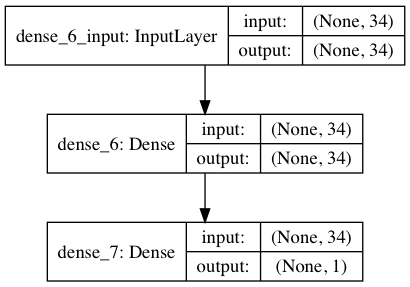

In [28]:
from IPython.display import Image
Image('model.png')

In [43]:
from pandas import read_csv
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import LearningRateScheduler
from keras.utils.vis_utils import plot_model

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1 + epoch) / epochs_drop))
    return lrate

seed = 7
np.random.seed(seed)

# load dataset
dataframe = read_csv('ionosphere.data', header=None)
dataset = dataframe.values
X = dataset[:, 0:34].astype(float)
Y = dataset[:, 34]  # g or b

# encoder class values as integers
# g or b => 0 or 1
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

# create model
model = Sequential()
model.add(Dense(34, input_dim=34, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
#model.summary()
#plot_model(model, show_shapes=True)

# compile model
sgd = SGD(lr=0.0, momentum=0.9, decay=0.0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# learning schedule callback
lrate = LearningRateScheduler(step_decay)

model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28,
          callbacks=[lrate], verbose=2)

Train on 235 samples, validate on 116 samples
Epoch 1/50
0s - loss: 0.6803 - acc: 0.6468 - val_loss: 0.6189 - val_acc: 0.9138
Epoch 2/50
0s - loss: 0.6188 - acc: 0.7277 - val_loss: 0.4750 - val_acc: 0.8879
Epoch 3/50
0s - loss: 0.4954 - acc: 0.8255 - val_loss: 0.3643 - val_acc: 0.9483
Epoch 4/50
0s - loss: 0.3604 - acc: 0.8596 - val_loss: 0.3756 - val_acc: 0.8879
Epoch 5/50
0s - loss: 0.2794 - acc: 0.8809 - val_loss: 0.1522 - val_acc: 0.9655
Epoch 6/50
0s - loss: 0.2156 - acc: 0.9191 - val_loss: 0.2205 - val_acc: 0.9397
Epoch 7/50
0s - loss: 0.1791 - acc: 0.9362 - val_loss: 0.1463 - val_acc: 0.9655
Epoch 8/50
0s - loss: 0.1587 - acc: 0.9319 - val_loss: 0.0846 - val_acc: 0.9655
Epoch 9/50
0s - loss: 0.1761 - acc: 0.9362 - val_loss: 0.1572 - val_acc: 0.9655
Epoch 10/50
0s - loss: 0.1251 - acc: 0.9617 - val_loss: 0.0939 - val_acc: 0.9914
Epoch 11/50
0s - loss: 0.1123 - acc: 0.9574 - val_loss: 0.0971 - val_acc: 0.9914
Epoch 12/50
0s - loss: 0.1040 - acc: 0.9574 - val_loss: 0.0807 - val_acc